## Here, we will write code to form the Filled fermi sea state


In [2]:
# Let u first understand how to writ coefficiens of a superposition state

from qiskit import QuantumCircuit
import qiskit_aer 
from qiskit.quantum_info.states.random import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_bloch_multivector

state_backend = qiskit_aer.StatevectorSimulator()

def initrstate(qc, label=""):
   state = random_statevector((2,1)).data
   print(state) # if you want to see what state you have initialized the qubit to
   init = Initialize(state)
   init.label = label
   return init

def viewstate(qc):
   result = execute(qc, state_backend).result()
   fstate = result.get_statevector()
   print(fstate) # This will be the superposition state
   return fstate

qc = QuantumCircuit(2)
init1 = initrstate(qc)
init2 = initrstate(qc)
qc.append(init1, [0])
qc.append(init2, [1])

plot_bloch_multivector(viewstate(qc)) #Plot the state vectors on the bloch sphere


[ 0.43421011+0.41520328j -0.01982273-0.79917137j]
[0.50427628-0.41218466j 0.75418697-0.08373325j]


NameError: name 'execute' is not defined

In [46]:
# Let us first create the array for k values to be used
import numpy as np


def array_k(num_qubits):  #assuming num_qubits is even
    array_k = []
    m = num_qubits/2
    if (m-1)%2!=0:
        for j in range(-int((m-1)//2),int((m-1)//2) + 1):
            array_k.append(2*np.pi*j/num_qubits)
    else:
        for j in range(-int((m-1)//2),int((m-1)//2)):
            array_k.append(2*np.pi*j/num_qubits)
    return array_k

print(array_k(6))


        



[-1.0471975511965976, 0.0]


In [4]:
num_qubits = 6

In [6]:
# Now we have an array, let us make the matrix on which we are going to store the proper k values

coeff_array = []
array_k = array_k(num_qubits)
for k in array_k:
    pos_list = []
    for x in range(num_qubits):
        pos_list.append(np.exp(-1j*k*x))
    coeff_array.append(pos_list)

coeff_array = np.array(coeff_array)
print(coeff_array)


[[ 1. +0.00000000e+00j  0.5+8.66025404e-01j -0.5+8.66025404e-01j
  -1. +1.22464680e-16j -0.5-8.66025404e-01j  0.5-8.66025404e-01j]
 [ 1. +0.00000000e+00j  1. +0.00000000e+00j  1. +0.00000000e+00j
   1. +0.00000000e+00j  1. +0.00000000e+00j  1. +0.00000000e+00j]]


In [7]:
'0'<'5' #checking how sorting works in character strings

True

In [20]:
def sort_bitstr(bitstr):
    bit_array = []
    for i in bitstr:
        bit_array.append(i)
    #print(bit_array)
    bitstr_sorted = ''
    for i in range(len(bit_array)):
        bit_array[i] = int(bit_array[i])
    bit_array.sort()
    #print(bit_array)
    for i in bit_array:
        #print(i,str(i))
        bitstr_sorted += str(i)
        #print(bitstr_sorted)

    return bitstr_sorted

print(sort_bitstr('02317'))

01237


In [23]:
def hammingDist(str1, str2): 
    i = 0
    count = 0
  
    while(i < len(str1)): 
        if(str1[i] != str2[i]): 
            count += 1
        i += 1
    return count 

def perm_str(bitstr,bitstr_sorted):
    c = hammingDist(bitstr,bitstr_sorted)
    if c%2 == 0:
        if int(c/2)%2 == 0:
            return 1
        else:
            return -1
    else:
        if int(c/2)%2 == 0:
            return -1
        else:
            return 1
    
bitstr = '053214'
bitstr_sorted = sort_bitstr(bitstr)

print(perm_str(bitstr,bitstr_sorted))

-1


In [29]:
# Now we have the coefficient array, let us use recursive calls to form the dict

m = int(num_qubits/2) # taking always even number of qubits
l = 0  
coeff_dict = {}
def recursive_nested(l,coeff = 1,bitstr=''):
    if l==m-2: # m-1, but we start with 0 indexing
        coeff_copy = coeff  #to ensure multiplied coeffs in previous rounds is preserved and reused
        bitstr_copy = bitstr
        for i in range(num_qubits):
            if str(i) in bitstr:
                pass
            else:
                coeff = coeff*coeff_array[l,i]
                bitstr = bitstr + f'{i}'
                bitstr_sorted = sort_bitstr(bitstr) #to sort the string first
                perm = perm_str(bitstr,bitstr_sorted) # to compare hamming distance
                if bitstr_sorted in coeff_dict.keys():
                    coeff_dict[bitstr_sorted]+=coeff*perm
                else:
                    coeff_dict[bitstr_sorted] = coeff*perm
            bitstr = bitstr_copy
            coeff = coeff_copy
    if l!=m-2:
        coeff_copy = coeff  #to ensure multiplied coeffs in previous rounds is preserved and reused
        bitstr_copy = bitstr
        for i in range(num_qubits):
            if str(i) in bitstr:
                pass
            else:
                #print(coeff)
                coeff = coeff*coeff_array[l,i]
                bitstr += str(i)
                recursive_nested(l+1,coeff,bitstr)
            bitstr = bitstr_copy
            coeff = coeff_copy
            


recursive_nested(l)
print(coeff_dict)

{'01': (0.4999999999999999-0.8660254037844386j), '02': (1.4999999999999998-0.8660254037844387j), '03': (2-1.2246467991473532e-16j), '04': (1.5000000000000004+0.8660254037844385j), '05': (0.5000000000000007+0.866025403784439j), '12': (0.9999999999999999-1.1102230246251565e-16j), '13': (1.5+0.8660254037844385j), '14': (1.0000000000000004+1.7320508075688772j), '15': (7.771561172376096e-16+1.7320508075688776j), '23': (0.5000000000000002+0.8660254037844386j), '24': (6.661338147750939e-16+1.7320508075688772j), '25': (-0.9999999999999991+1.7320508075688776j), '34': (-0.49999999999999956+0.8660254037844386j), '35': (-1.4999999999999993+0.8660254037844392j), '45': (-0.9999999999999998+5.551115123125783e-16j)}


In [31]:
#Now that we have got the dictionary of phases, we make a complex vector

coeff_list = [0]*num_qubits
for bstr in coeff_dict.keys():
    for k in range(m-1):
        coeff_list[int(bstr[k])]+= coeff_dict[bstr]

print(coeff_list)

[(6.000000000000001+1.1102230246251565e-16j), (4.000000000000001+3.4641016151377544j), (2.0000000000000018+3.4641016151377544j), (2.000000000000001+3.464101615137755j), (1.0000000000000024+5.196152422706632j), (-2.9999999999999964+5.196152422706635j)]


In [42]:
# let us see if statevector initialization ensures normalization
import qiskit
from qiskit.quantum_info import Statevector


In [43]:
data = np.array([1,1]).reshape(1,2)
print(data)
sv = Statevector([1,1])
sv.data

[[1 1]]


array([1.+0.j, 1.+0.j])

In [51]:
#let us normalize our vector

phase_array = np.array(coeff_list)
phase_array = phase_array/np.linalg.norm(phase_array)

# to use state vector formalism, we need to initialize bitstrings
bitstr_dict = {}
for bstr in coeff_dict.keys():
    vac_str = ''
    num_list = []
    for k in range(m-1):
        num_list.append(int(bstr[k]))

    for i in range(num_qubits):
        if i in num_list:
            vac_str += '1'
        else:
            vac_str += '0'
    bitstr_dict[vac_str] = coeff_dict[bstr]

print(bitstr_dict)





{'110000': (0.4999999999999999-0.8660254037844386j), '101000': (1.4999999999999998-0.8660254037844387j), '100100': (2-1.2246467991473532e-16j), '100010': (1.5000000000000004+0.8660254037844385j), '100001': (0.5000000000000007+0.866025403784439j), '011000': (0.9999999999999999-1.1102230246251565e-16j), '010100': (1.5+0.8660254037844385j), '010010': (1.0000000000000004+1.7320508075688772j), '010001': (7.771561172376096e-16+1.7320508075688776j), '001100': (0.5000000000000002+0.8660254037844386j), '001010': (6.661338147750939e-16+1.7320508075688772j), '001001': (-0.9999999999999991+1.7320508075688776j), '000110': (-0.49999999999999956+0.8660254037844386j), '000101': (-1.4999999999999993+0.8660254037844392j), '000011': (-0.9999999999999998+5.551115123125783e-16j)}


In [59]:
fermi_state = Statevector([0]*(2**num_qubits))

for bstr in bitstr_dict.keys():
    fermi_state += Statevector.from_label(bstr)*bitstr_dict[bstr]

val_array = []
for i in bitstr_dict.values():
    val_array.append(i)
val_array = np.array(val_array)
#print(val_array)
#print(np.linalg.norm(val_array))
fermi_state = fermi_state/np.linalg.norm(val_array)
print(fermi_state)
fermi_state.is_valid()

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -1.66666667e-01+9.25185854e-17j,
              0.00000000e+00+0.00000000e+00j,
             -2.50000000e-01+1.44337567e-01j,
             -8.33333333e-02+1.44337567e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -1.66666667e-01+2.88675135e-01j,
              1.11022302e-16+2.88675135e-01j,
              0.00000000e+00+0.00000000e+00j,
              8.33333333e-02+1.44337567e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.29526020e-16+2.88675135e-01j,
              1.66666667e-01+2.88675135e-01j,
              0.00000000e+00+0.00000000e+00j,
              2.50000000e-01+1.44337567e-01j,
              0.00000000e+00+0.000

True

In [47]:
from qiskit import QuantumCircuit
import qiskit_aer 
from qiskit.quantum_info.states.random import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_bloch_multivector

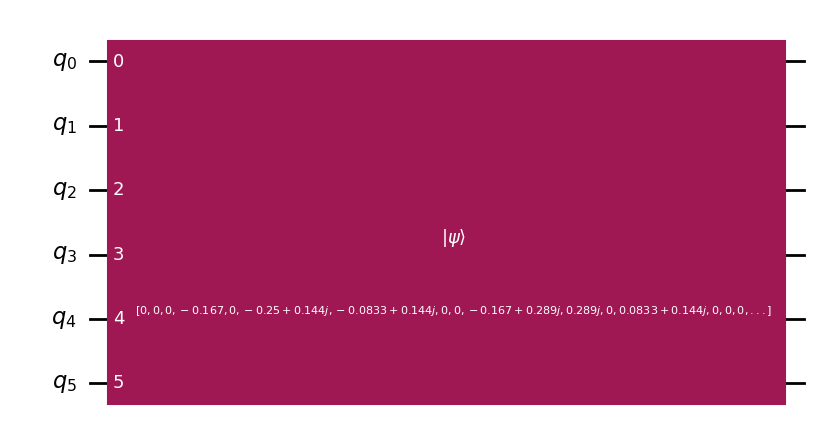

In [61]:
qc = QuantumCircuit(num_qubits)
qc.initialize(fermi_state)

qc.draw(output = 'mpl')